# Plotting omics data

In [2]:
#Load packages

library(tidyverse)
library(plotly)
library(vegan)
library(RColorBrewer)
library(readxl)

#ignore warnings ;)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



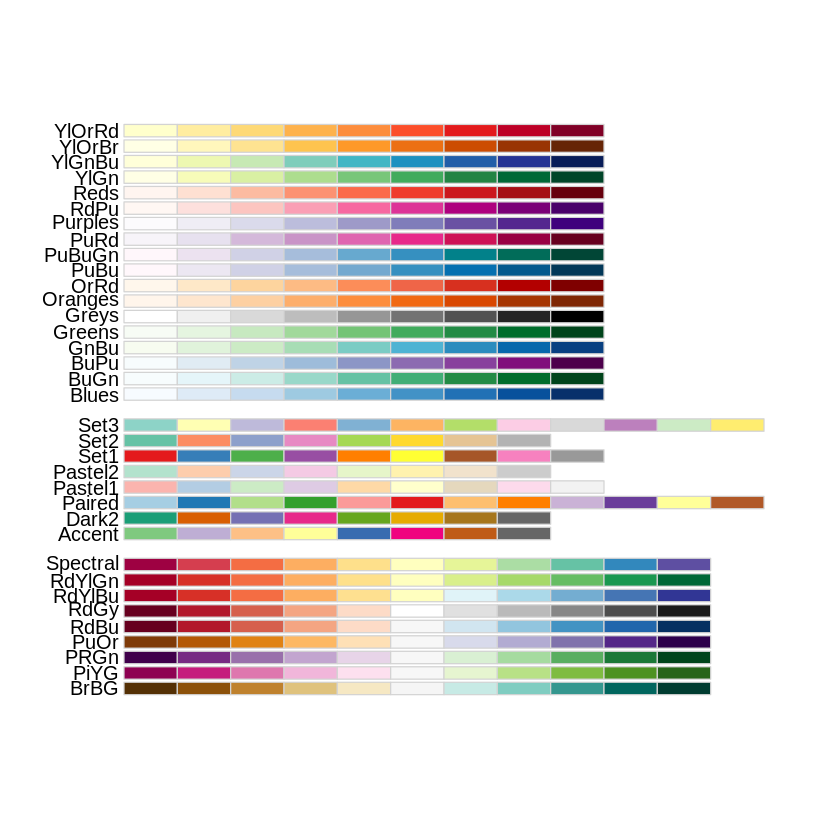

In [3]:
#using one of the RColorBrewer can be convenient
#you can see all offered combination
display.brewer.all()

In [4]:
# and you can set palette you want
palette(brewer.pal(n=12, name = "Set3"))


## Dataset
We will use the amplicon dataset of the bacterial communities of Cariaco Basin (off the coast of Venezuela) from [Suter et al. 2018](https://sfamjournals.onlinelibrary.wiley.com/doi/full/10.1111/1462-2920.13997)
- The Cariaco Basin is a permanently stratified water column. The stratification has created an anoxic and euxinic deep water layer.
- We sampled along the oxygen gradient from the upper oxic layer to bottom anoxic (Oxic -> Dysoxic -> Suboxic -> Anoxic ->Sulfidic->Euxinic) in two different time point (May and November of 2014)

### Import and take a glance at the data

In [5]:
#Import the output table (after the analysis of sequences)
cariaco_table <- read.delim("input_data/Cariaco_Bac_OTU.txt", sep = "\t")

In [6]:
#let's verify that it is there
ls()

[1] "cariaco_table"

In [7]:
#observe the first rows
head(cariaco_table)

,OTU.ID,CarOxic_May_103,CarDysox_May_198,CarSuboxic_May_234,CarAnox_May_295,CarSulf_May_314,CarEux_May_900,CarOxic_Nov_143,CarDysox_Nov_200,CarSuboxic_Nov_237,CarAnox_Nov_247,CarSulf_Nov_267,CarEux_Nov_900,taxonomy
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,denovo231149,26,4646,21158,252604,170582,299,367,14685,86132,197506,216557,372,Bacteria; Proteobacteria; Gammaproteobacteria; Chromatiales; Ectothiorhodospiraceae; Thiorhodospira; uncultured_bacterium
2,denovo348086,2,32,152,5450,22655,74004,1,38,529,1093,5579,50007,Bacteria; Deferribacteres; Deferribacterales; SAR406_clade(Marine_group_A); uncultured_bacterium
3,denovo309274,6186,9204,11774,10348,7190,2,6582,16940,27928,37166,17760,3,Bacteria; Deferribacteres; Deferribacterales; SAR406_clade(Marine_group_A); uncultured_bacterium
4,denovo118147,250,639,1670,24011,26630,52,509,1889,16765,35621,24597,63,Bacteria; Deferribacteres; Deferribacterales; SAR406_clade(Marine_group_A); uncultured_bacterium
5,denovo302903,1,11,36,2854,15189,63198,0,34,53,334,1381,47312,Bacteria; Deferribacteres; Deferribacterales; SAR406_clade(Marine_group_A); uncultured_bacterium
6,denovo340,6590,10266,10131,50,1,0,16647,71226,6457,1664,2,1,Bacteria; Proteobacteria; Deltaproteobacteria; SAR324_clade(Marine_group_B); uncultured_marine_microorganism


In [8]:
#And the last rows
tail(cariaco_table)

,OTU.ID,CarOxic_May_103,CarDysox_May_198,CarSuboxic_May_234,CarAnox_May_295,CarSulf_May_314,CarEux_May_900,CarOxic_Nov_143,CarDysox_Nov_200,CarSuboxic_Nov_237,CarAnox_Nov_247,CarSulf_Nov_267,CarEux_Nov_900,taxonomy
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
75801,denovo440567,0,0,0,0,0,0,1,0,0,0,0,0,No blast hit
75802,denovo463170,0,0,0,0,0,0,0,0,0,0,0,1,No blast hit
75803,denovo468755,0,0,0,0,0,0,0,0,0,0,0,1,No blast hit
75804,denovo471186,1,0,0,0,0,0,0,0,0,0,0,0,No blast hit
75805,denovo473707,1,0,0,0,0,0,0,0,0,0,0,0,No blast hit
75806,denovo474555,0,0,0,0,0,1,0,0,0,0,0,0,No blast hit


In [9]:
colSums(cariaco_table[,2:13]==0)

CarOxic_May_103   CarDysox_May_198 CarSuboxic_May_234    CarAnox_May_295 
             52799              59550              64414              70611 
   CarSulf_May_314     CarEux_May_900    CarOxic_Nov_143   CarDysox_Nov_200 
             69096              71560              53114              62811 
CarSuboxic_Nov_237    CarAnox_Nov_247    CarSulf_Nov_267     CarEux_Nov_900 
             57151              59673              67867              69147

In [11]:
colSums(cariaco_table[,2:13]==0)/nrow(cariaco_table[,2:13])

CarOxic_May_103   CarDysox_May_198 CarSuboxic_May_234    CarAnox_May_295 
         0.6965016          0.7855579          0.8497217          0.9314698 
   CarSulf_May_314     CarEux_May_900    CarOxic_Nov_143   CarDysox_Nov_200 
         0.9114846          0.9439886          0.7006569          0.8285756 
CarSuboxic_Nov_237    CarAnox_Nov_247    CarSulf_Nov_267     CarEux_Nov_900 
         0.7539113          0.7871804          0.8952721          0.9121573

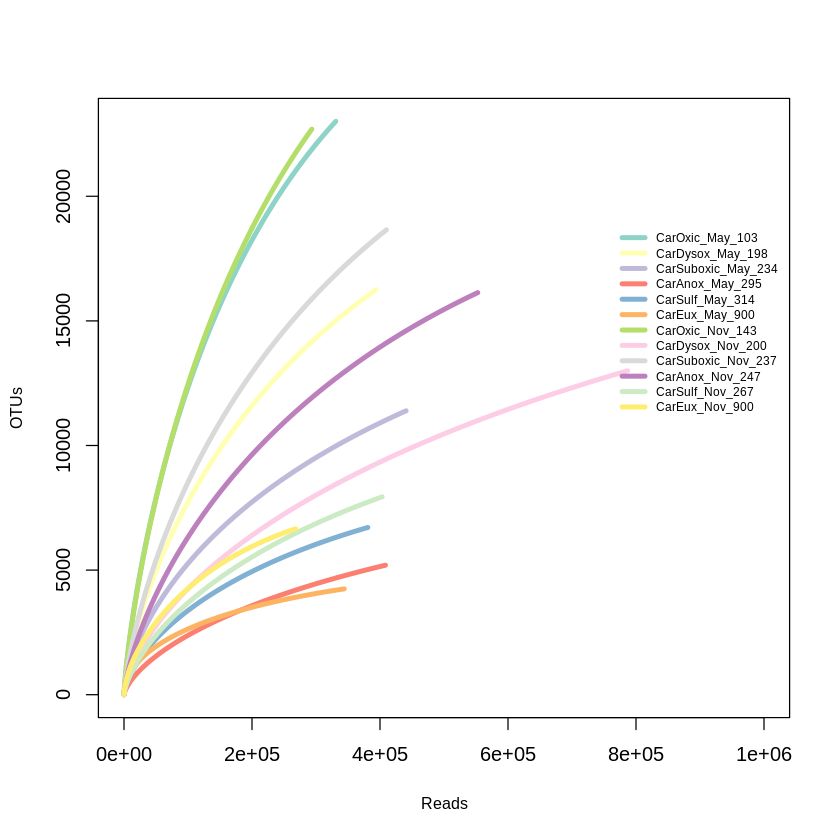

In [12]:
#"Rarecurve" is a plot of the number of species (OTUs) as a function of the number of reads. Rarefaction curves generally grow rapidly at first, as the most common species are found, but the curves plateau as only the rarest species remain to be sampled
#This function requires samples to be the row names and the "species" the columns for this reason we transpose the table
rarecurve(t(cariaco_table[,2:13]),step=1000,col=1:12,xlab = "Reads",ylab = "OTUs",
          lwd=4,cex.lab=0.8,xlim=c(0,1000000),label=F)
legend("topright",rownames(t(cariaco_table[,2:13])),col=1:12,
       cex=0.6,lwd=4,horiz=F, bty="n", inset = c(0, 0.2))

In [13]:
#Transform the table to long format with pivot_longer
#We will also parse the sample headers. This will add information to our table that will come handy during plotting
#Finally we will separate the taxonomy to it's different ranks ("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")
cariaco_long <- cariaco_table %>%
  pivot_longer(cols = CarOxic_May_103:CarEux_Nov_900, names_to = "Sample", values_to = "Count") %>%
  separate(Sample, c("Feature", "Month", "Depth"), sep = "_", remove = FALSE) %>%
  separate(taxonomy, c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"), sep = "; ", remove = FALSE) %>%
  data.frame

Warning message:
“Expected 7 pieces. Additional pieces discarded in 3792 rows [685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, ...].”
Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 580284 rows [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, ...].”


In [14]:
head(cariaco_long)

,OTU.ID,taxonomy,Kingdom,Phylum,Class,Order,Family,Genus,Species,Sample,Feature,Month,Depth,Count
,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,denovo231149,Bacteria; Proteobacteria; Gammaproteobacteria; Chromatiales; Ectothiorhodospiraceae; Thiorhodospira; uncultured_bacterium,Bacteria,Proteobacteria,Gammaproteobacteria,Chromatiales,Ectothiorhodospiraceae,Thiorhodospira,uncultured_bacterium,CarOxic_May_103,CarOxic,May,103,26
2,denovo231149,Bacteria; Proteobacteria; Gammaproteobacteria; Chromatiales; Ectothiorhodospiraceae; Thiorhodospira; uncultured_bacterium,Bacteria,Proteobacteria,Gammaproteobacteria,Chromatiales,Ectothiorhodospiraceae,Thiorhodospira,uncultured_bacterium,CarDysox_May_198,CarDysox,May,198,4646
3,denovo231149,Bacteria; Proteobacteria; Gammaproteobacteria; Chromatiales; Ectothiorhodospiraceae; Thiorhodospira; uncultured_bacterium,Bacteria,Proteobacteria,Gammaproteobacteria,Chromatiales,Ectothiorhodospiraceae,Thiorhodospira,uncultured_bacterium,CarSuboxic_May_234,CarSuboxic,May,234,21158
4,denovo231149,Bacteria; Proteobacteria; Gammaproteobacteria; Chromatiales; Ectothiorhodospiraceae; Thiorhodospira; uncultured_bacterium,Bacteria,Proteobacteria,Gammaproteobacteria,Chromatiales,Ectothiorhodospiraceae,Thiorhodospira,uncultured_bacterium,CarAnox_May_295,CarAnox,May,295,252604
5,denovo231149,Bacteria; Proteobacteria; Gammaproteobacteria; Chromatiales; Ectothiorhodospiraceae; Thiorhodospira; uncultured_bacterium,Bacteria,Proteobacteria,Gammaproteobacteria,Chromatiales,Ectothiorhodospiraceae,Thiorhodospira,uncultured_bacterium,CarSulf_May_314,CarSulf,May,314,170582
6,denovo231149,Bacteria; Proteobacteria; Gammaproteobacteria; Chromatiales; Ectothiorhodospiraceae; Thiorhodospira; uncultured_bacterium,Bacteria,Proteobacteria,Gammaproteobacteria,Chromatiales,Ectothiorhodospiraceae,Thiorhodospira,uncultured_bacterium,CarEux_May_900,CarEux,May,900,299


In [15]:
dim(cariaco_table)
dim(cariaco_long)

[1] 75806    14

[1] 909672     14

In [16]:
#check the summaries on the Kindgom level
cariaco_long %>% group_by(Kingdom) %>% summarize (Total_counts=sum(Count))

`summarise()` ungrouping output (override with `.groups` argument)



Kingdom,Total_counts
<chr>,<int>
Bacteria,5000011
No blast hit,14178


In [17]:
#replace "No blast hit" with NA
cariaco_long[cariaco_long =="No blast hit" ] <- NA

In [18]:
# Summarize the counts to phylum level for each Sample; we will filter out the non-annotated
phylum_sum <- cariaco_long %>%
  filter(!is.na(Kingdom)) %>%
  group_by(Sample, Feature,Month, Phylum) %>%
  summarise(phylum_counts = sum(Count)) %>%
  data.frame

head(phylum_sum)

`summarise()` regrouping output by 'Sample', 'Feature', 'Month' (override with `.groups` argument)



,Sample,Feature,Month,Phylum,phylum_counts
,<chr>,<chr>,<chr>,<chr>,<int>
1,CarAnox_May_295,CarAnox,May,Acidobacteria,260
2,CarAnox_May_295,CarAnox,May,Actinobacteria,2562
3,CarAnox_May_295,CarAnox,May,Aquificae,1
4,CarAnox_May_295,CarAnox,May,Armatimonadetes,2
5,CarAnox_May_295,CarAnox,May,Bacteroidetes,1887
6,CarAnox_May_295,CarAnox,May,BD1-5,179


### Create barplots to start exploring the data 
For most of the plots we are going to use ggplot2. [Datacarpenty has a great tutorial](https://datacarpentry.org/R-ecology-lesson/04-visualization-ggplot2.html) on this package.

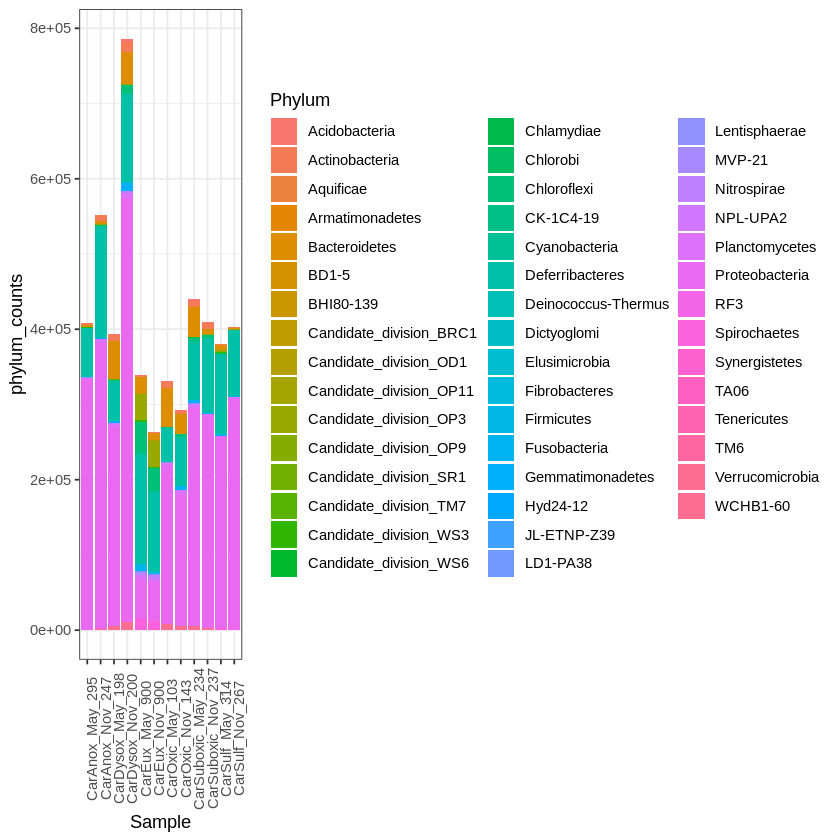

In [19]:
ggplot(phylum_sum, aes(x = Sample, y = phylum_counts, fill = Phylum)) +
  geom_bar(stat = "identity", position = "stack") + theme_bw()+
  theme(axis.text.x = element_text(angle = 90))


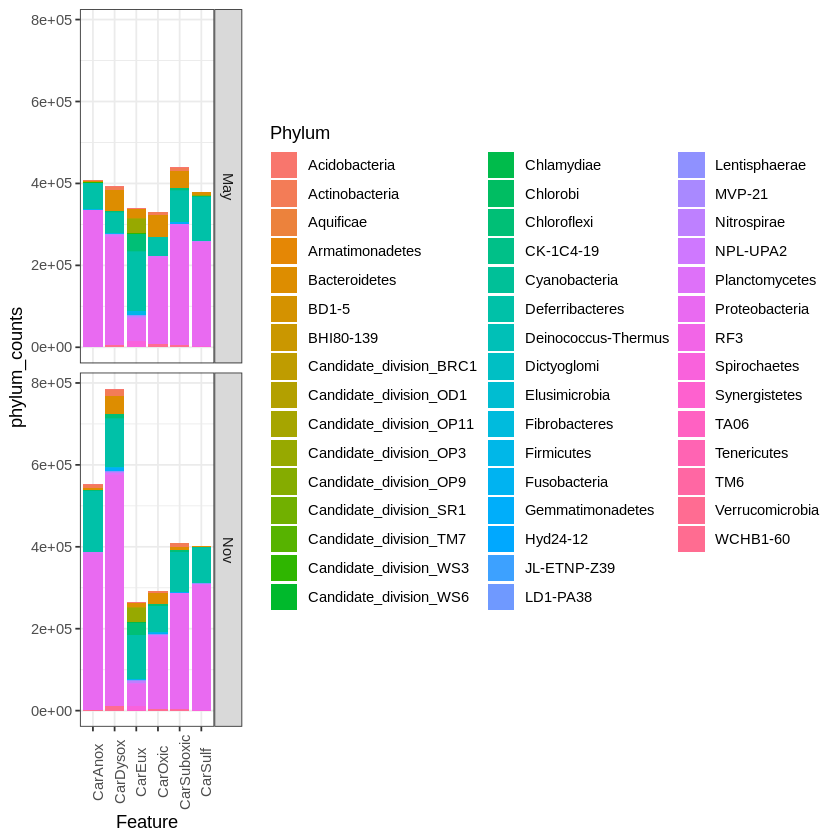

In [20]:
ggplot(phylum_sum, aes(x = Feature, y = phylum_counts, fill = Phylum)) +
  geom_bar(stat = "identity", position = "stack") + facet_grid(Month~.)+ theme_bw()+
  theme(axis.text.x = element_text(angle = 90))

In [21]:
#there are too many phyla (thus too many colors) and as we can see from the plots we can only discern a handful
#let's try using only "top ten" phyla

phylum10<-cariaco_long %>%
  group_by(Phylum) %>%
  summarise(phylum_counts = sum(Count)) %>% top_n(10)

`summarise()` ungrouping output (override with `.groups` argument)

Selecting by phylum_counts



In [22]:
#and use the top ten hits to make the list that we are going to use for our selection
phylum10_list<-phylum10$Phylum

In [23]:
phylum10_list

[1] "Actinobacteria"         "Bacteroidetes"          "Candidate_division_OP3"
 [4] "Chloroflexi"            "Deferribacteres"        "Gemmatimonadetes"      
 [7] "Planctomycetes"         "Proteobacteria"         "Spirochaetes"          
[10] "Verrucomicrobia"

In [24]:
#filter the phylum_sum we created above to contain only the phyla found in the top 10 list
phylum10_sum<-phylum_sum %>% filter(Phylum %in% phylum10_list)

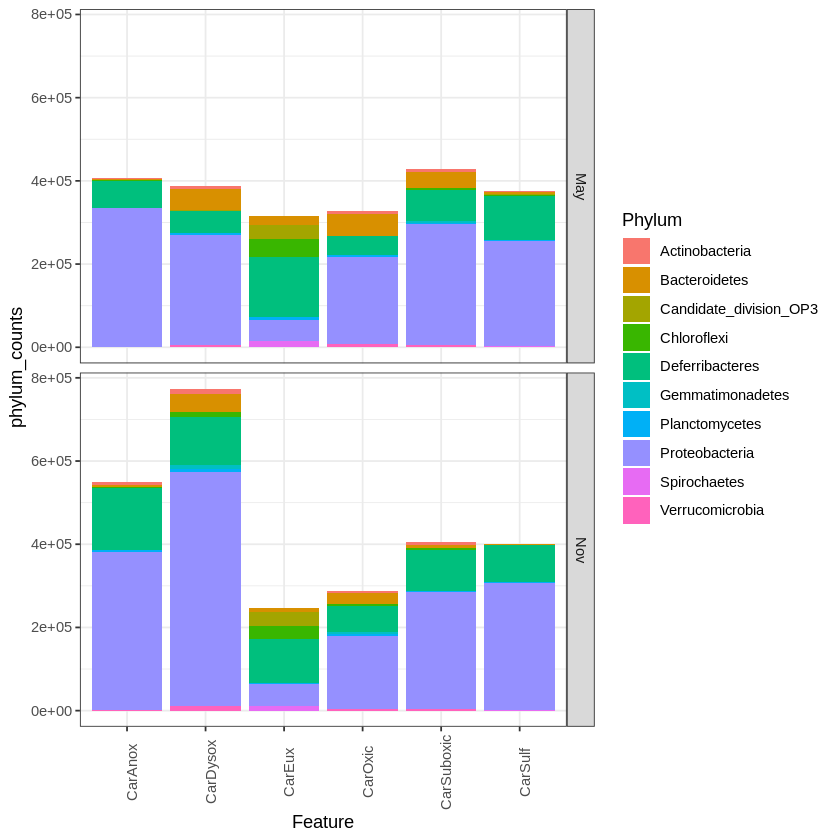

In [25]:
ggplot(phylum10_sum, aes(x = Feature, y = phylum_counts, fill = Phylum)) +
  geom_bar(stat = "identity", position = "stack") + facet_grid(Month~.)+ theme_bw()+
  theme(axis.text.x = element_text(angle = 90), )

In [ ]:
#write your own code
#can check how many reads were excluded by only plotting the 10 more abundant phyla?

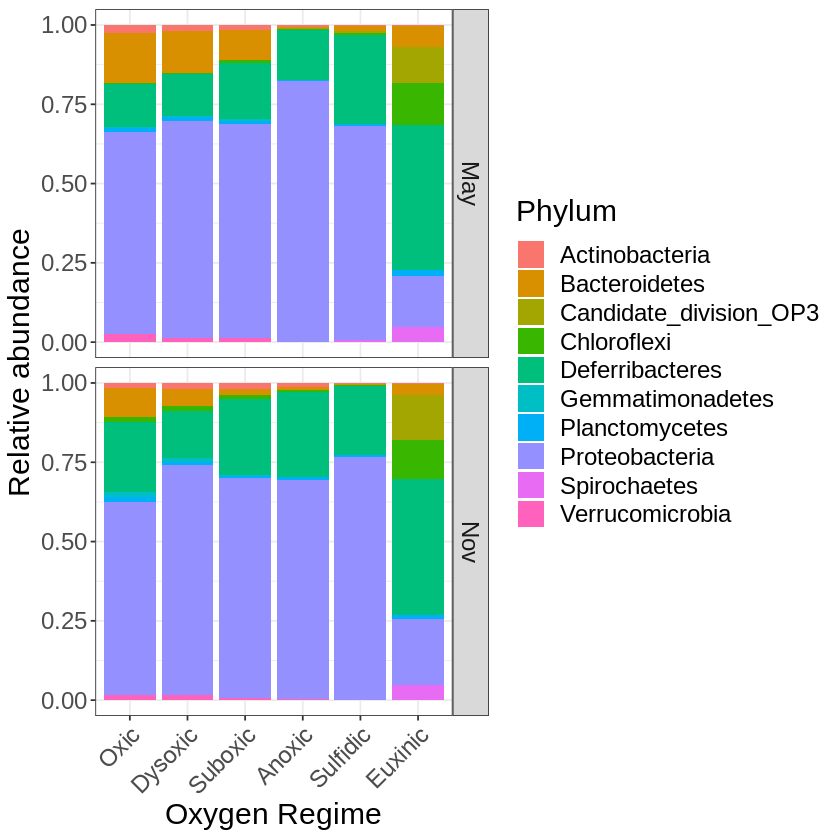

In [26]:
#order and rename the features
#rename the axis
#plot relative abundance
ggplot(phylum10_sum, aes(x = Feature, y = phylum_counts, fill = Phylum)) +
  scale_x_discrete(name ="Oxygen Regime", limits=c("CarOxic", "CarDysox","CarSuboxic","CarAnox","CarSulf", "CarEux"),   labels=c("Oxic",  "Dysoxic", "Suboxic", "Anoxic", "Sulfidic", "Euxinic")) + labs(x='', y = "Relative abundance")+
  geom_bar(stat = "identity", position = "fill") + facet_grid(Month~.)+ theme_bw()+
  theme(axis.text.x = element_text(angle = 45,hjust = 1, vjust = 1), text = element_text(size = 18))


In [27]:
#write your own code
# can you reverse axes (in order for the y axis to represent depth and go from Oxic (top od water column) to Euxinic (deepest))

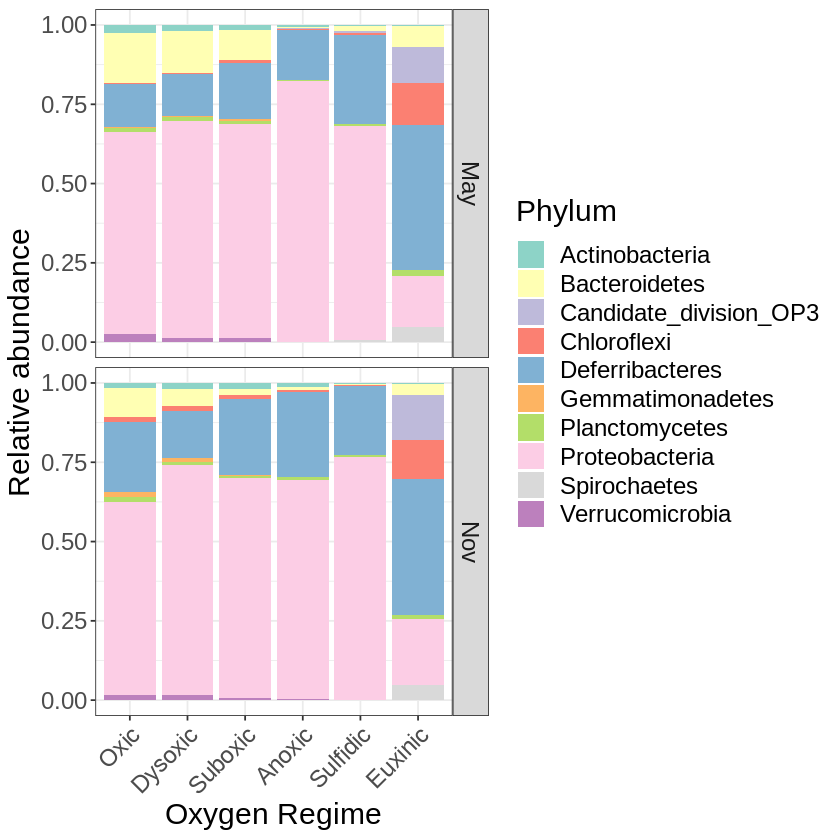

In [28]:
#change the palette, just for fun
ggplot(phylum10_sum, aes(x = Feature, y = phylum_counts, fill = Phylum)) +
  scale_x_discrete(name ="Oxygen Regime", limits=c("CarOxic", "CarDysox","CarSuboxic","CarAnox","CarSulf", "CarEux"),   labels=c("Oxic",  "Dysoxic", "Suboxic", "Anoxic", "Sulfidic", "Euxinic")) + labs(x='', y = "Relative abundance")+
  geom_bar(stat = "identity", position = "fill") + scale_fill_brewer(palette = "Set3") +facet_grid(Month~.)+ theme_bw()+
  theme(axis.text.x = element_text(angle = 45,hjust = 1, vjust = 1),text = element_text(size = 18))

The relative abundance of Proteobacteria seems not to be changing much for the first 5 depths (corresponding to different depths, oxygen etc). Such dramatic changes in the environment should have caused the microbial communities to shift. But, Proteobacteria is a very diverse phylum so the changes with be obvious in the "subgroups" e.g. Class level. Let's explore this further, 

In [29]:
# Summarize to phylum level, filter out the non-annotated, and select only Proteobacteria. Group by class
class_sum <- cariaco_long %>%
  filter(!is.na(Kingdom)& Phylum=="Proteobacteria") %>%
  group_by(Sample, Feature,Month, Class) %>%
  summarise(class_counts = sum(Count)) %>%
  data.frame

`summarise()` regrouping output by 'Sample', 'Feature', 'Month' (override with `.groups` argument)



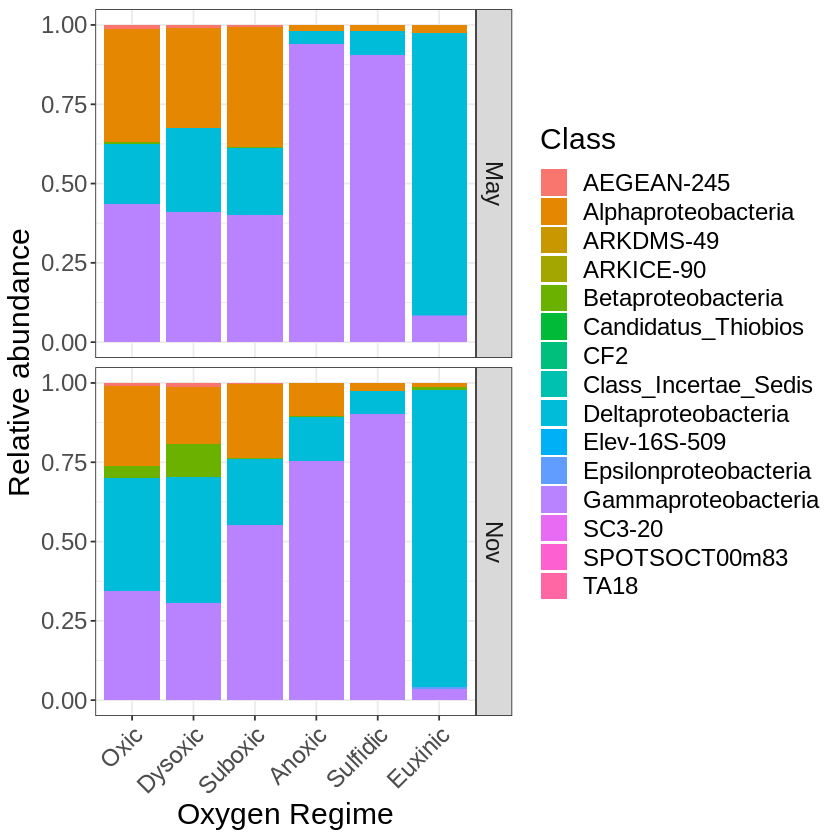

In [30]:
ggplot(class_sum, aes(x = Feature, y = class_counts, fill = Class)) +
  scale_x_discrete(name ="Oxygen Regime", limits=c("CarOxic", "CarDysox","CarSuboxic","CarAnox","CarSulf", "CarEux"),   labels=c("Oxic",  "Dysoxic", "Suboxic", "Anoxic", "Sulfidic", "Euxinic")) + labs(x='', y = "Relative abundance")+
  geom_bar(stat = "identity", position = "fill") + facet_grid(Month~.)+ theme_bw()+
  theme(axis.text.x = element_text(angle = 45,hjust = 1, vjust = 1), text = element_text(size = 18))

## Ordinations
Cluster analysis encompasses several multivariate techniques that are used to group objects into categories based on their dissimilarities. It is a commonly used method for revealing patterns (and investigate potential effects of environmental factors; see below).  
There are several different methods (each with its own assumptions on the normality etc of the data). The biggest challenge of applying these methods in omics data is the presence of zeros.   
We do not have time to discuss all these aspects but you can find more info in the excellent paper by [Ramette 2017](https://academic.oup.com/femsec/article/62/2/142/434668).
Please also check Sarah's [excellent tutorial](https://academic.oup.com/femsec/article/62/2/142/434668)

The data need [transformation](http://biol09.biol.umontreal.ca/PLcourses/Section_7.7_Transformations.pdf). One of the most commonly used transformations is helling. Log-ratio transformations are also used often. 

In [31]:
#hellinger transformatipn
carhell <- decostand (t(cariaco_table[,2:13]), method = 'hellinger')

Principal Components Analysis

In [32]:
#PCA analysis
#remember that you can use ?prcomp to check the command
carhell_pca <- prcomp(carhell)
class(carhell_pca)
carhell_pca$sdev # Explore components of prcomp output

[1] "prcomp"

[1] 5.094080e-01 4.394540e-01 1.819534e-01 1.459108e-01 1.378616e-01
 [6] 1.066676e-01 8.403391e-02 7.451755e-02 6.726748e-02 6.057795e-02
[11] 5.352622e-02 6.208611e-16

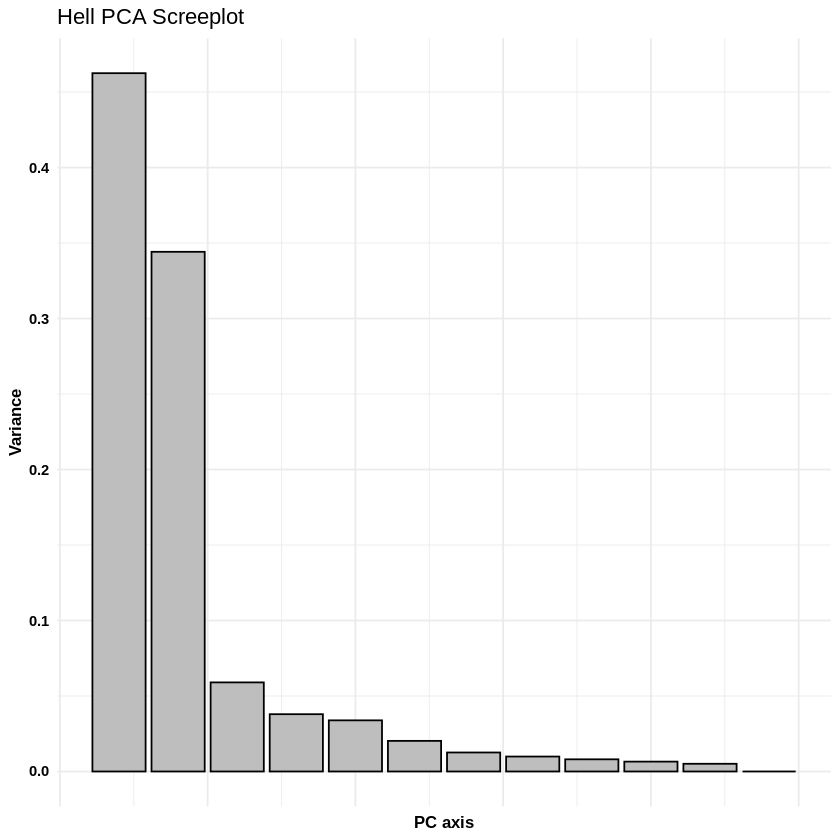

In [33]:
# Visual representation - screeplot
# This is just a guide to help you decide on a 2-D vs 3-D analysis
# Let's skip due to time constrains
carhell_pca_variances <- as.data.frame(carhell_pca$sdev^2/sum(carhell_pca$sdev^2)) %>% #Extract axes
# Format to plot
select(Var = 'carhell_pca$sdev^2/sum(carhell_pca$sdev^2)') %>%
rownames_to_column(var = "PCaxis") %>%
  data.frame

# Plot screeplot
ggplot(carhell_pca_variances, aes(x = as.numeric(PCaxis), y = Var)) + 
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  theme_minimal() +
  theme(axis.title = element_text(color = "black", face = "bold", size = 10),
        axis.text.y = element_text(color = "black", face = "bold"),
        axis.text.x = element_blank()) +
  labs(x = "PC axis", y = "Variance", title = "Hell PCA Screeplot")

In [34]:
# To visualize the PCA, first make a dataframe of the data

carhell_pca_out <- data.frame(carhell_pca$x) %>% 
  rownames_to_column(var="Name") %>%
  separate(Name, into =c("Feature", "Month", "Depth")) %>%
  data.frame
head(carhell_pca_out)

,Feature,Month,Depth,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CarOxic,May,103,-0.5546599,0.221653397,0.47932896,0.04860745,-0.065896085,0.113248262,-0.03812474,0.011749133,-0.002440230,-0.001860601,0.0033812576,1.502172e-15
2,CarDysox,May,198,-0.5504735,0.079081032,0.01004227,0.03091597,0.204603028,-0.053005561,0.21002751,-0.006892415,0.006564428,0.021075578,-0.0002892006,7.584172e-16
3,CarSuboxic,May,234,-0.4646013,-0.003812373,-0.08290544,0.07064080,0.258878478,-0.079175855,-0.16716048,-0.045496781,-0.012467556,-0.035096179,-0.0096626246,1.090723e-15
4,CarAnox,May,295,0.4122423,-0.456372131,0.05791304,-0.12822622,0.062145808,-0.006354482,-0.03750251,-0.009437335,-0.020462202,0.131664575,0.0800729047,-5.385840e-17
5,CarSulf,May,314,0.5529896,-0.271913457,0.08021931,-0.18704217,0.088087892,-0.011909628,0.01279110,0.131702869,0.005188504,-0.106686216,0.0051434485,4.986432e-16
6,CarEux,May,900,0.5926912,0.764538494,-0.03397132,0.05323962,0.007044793,-0.014684400,-0.01940377,0.007994971,0.152714076,0.031503971,-0.0082961733,4.378949e-17


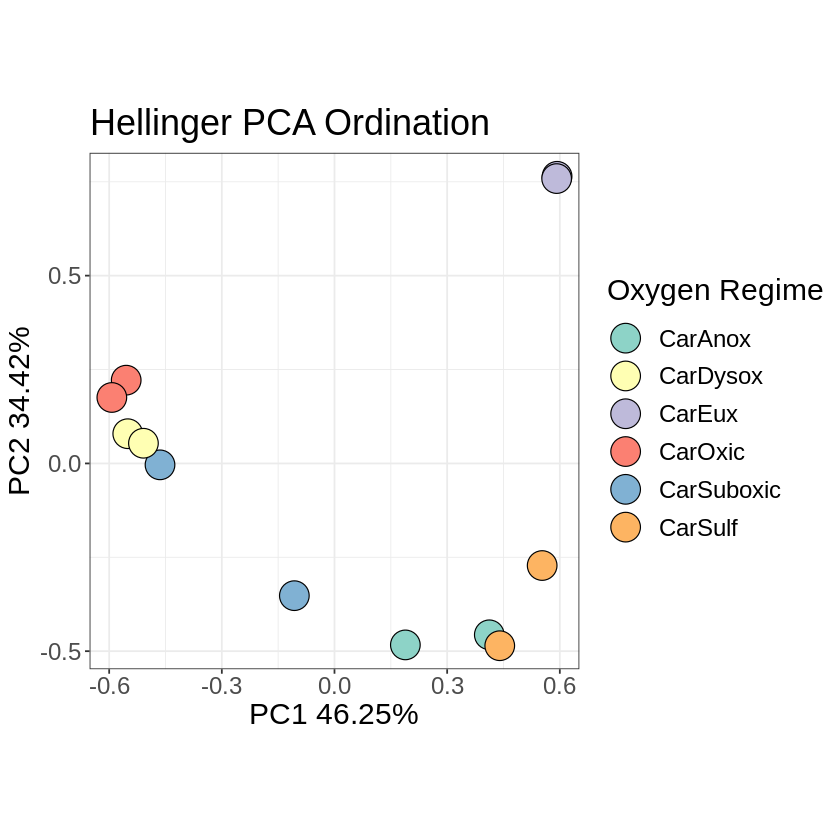

In [35]:
ggplot(carhell_pca_out) +
  geom_point(aes(x = PC1, y = PC2, fill=Feature), shape =21, size = 8) +
  ylab(paste0('PC2 ', round(carhell_pca_variances[2,2]*100,2),'%')) + #Extract y axis value from variance
  xlab(paste0('PC1 ', round(carhell_pca_variances[1,2]*100,2),'%')) + #Extract x axis value from variance
  scale_fill_brewer(palette = 'Set3', name = 'Oxygen Regime') +  
  ggtitle('Hellinger PCA Ordination') +
  coord_fixed(ratio = 1) +
  theme_bw()+theme(text = element_text(size = 18))

In [36]:
#fit the environmental factors
#import metadata table
metadata<-read.delim("input_data/Cariaco_metadata.txt")

#The function fits environmental vectors or factors onto an ordination. The projections of points onto vectors have maximum correlation with corresponding environmental variables, and the factors show the averages of factor levels.
envfit(carhell_pca, metadata, na.rm = TRUE, permutations = 9999)


***VECTORS

                   PC1      PC2     r2 Pr(>r)  
Oxygen        -0.90904  0.41672 0.4427 0.1125  
Depth          0.66042  0.75090 0.8589 0.0376 *
Temperature   -0.99999 -0.00446 0.5071 0.0618 .
Salinity      -0.97972 -0.20038 0.4403 0.1074  
H2S            0.51609  0.85653 0.9091 0.0451 *
Particulate_S  0.54544 -0.83815 0.4403 0.0974 .
TSVS           0.34323 -0.93925 0.3878 0.1533  
CH4            0.56307  0.82641 0.8812 0.0553 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 9999

***FACTORS:

Centroids:
                                     PC1     PC2
SampleCarAnox_May_295             0.1887 -0.4833
SampleCarAnox_Nov_247             0.4122 -0.4564
SampleCarDysox_May_198           -0.5087  0.0537
SampleCarDysox_Nov_200           -0.5505  0.0791
SampleCarEux_Nov_900              0.5927  0.7645
SampleCarOxic_May_103            -0.5929  0.1755
SampleCarOxic_Nov_143            -0.5547  0.2217
SampleCarSuboxic_May_234

In [37]:
#covert to dataframe
envfactors<-envfit(carhell_pca, metadata, na.rm = TRUE, permutations = 9999)
en_coord_cont = as.data.frame(scores(envfactors, "vectors")) * ordiArrowMul(envfactors)

#and choose only the significant factors to plot
en_coord_cont%>%rownames_to_column()%>%filter(rowname=="Depth"|rowname =="H2S") %>% column_to_rownames()->en_coord_cont_sign

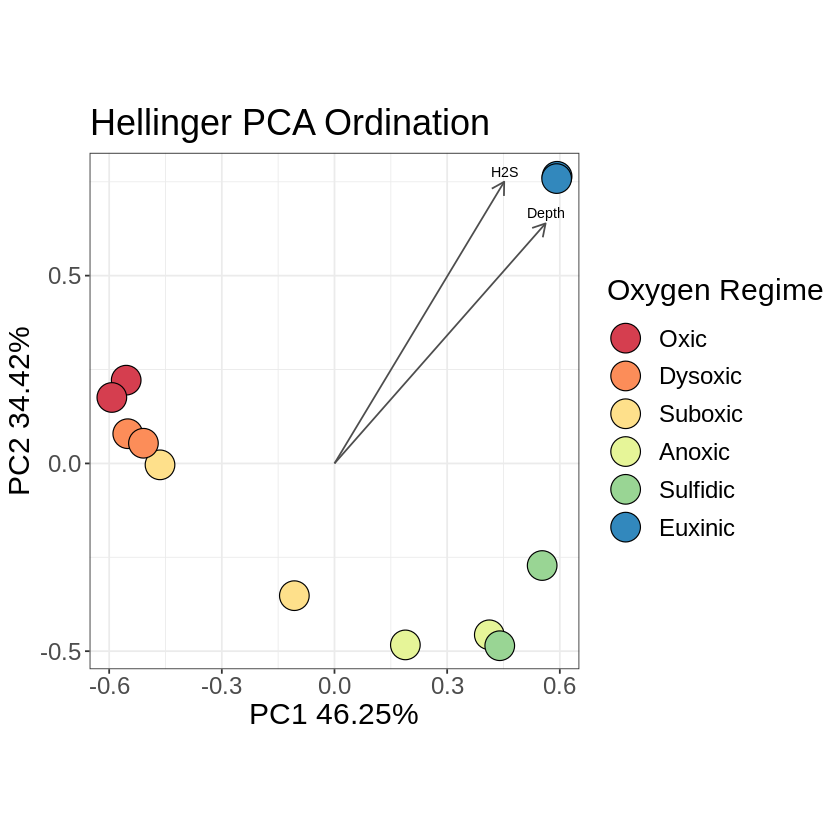

In [38]:
ggplot(carhell_pca_out) +
  geom_point(aes(x = PC1, y = PC2, fill = Feature), size = 8, shape = 21, color = "black") +
  geom_segment(data=en_coord_cont_sign,aes(x=0,xend=PC1,y=0,yend=PC2),
      arrow = arrow(length = unit(0.3, "cm")),colour="grey30") + 
  geom_text(data=en_coord_cont_sign,aes(x=PC1,y=PC2, label= row.names(en_coord_cont_sign)),size=3, vjust=-0.5)+
  ylab(paste0('PC2 ', round(carhell_pca_variances[2,2]*100,2),'%')) + #Extract y axis value from variance
  xlab(paste0('PC1 ', round(carhell_pca_variances[1,2]*100,2),'%')) + #Extract x axis value from variance
  scale_fill_brewer(palette = 'Spectral', name = 'Oxygen Regime', limits=c("CarOxic", "CarDysox","CarSuboxic","CarAnox","CarSulf", "CarEux"),   labels=c("Oxic",  "Dysoxic", "Suboxic", "Anoxic", "Sulfidic", "Euxinic")) +
  ggtitle('Hellinger PCA Ordination') +
  coord_fixed() +
  theme_bw()+ theme(text = element_text(size = 18))

In [ ]:
#for the interest of time we worked with a small dataset (*small refers to the total number of samples)
download.file("http://taraoceans.sb-roscoff.fr/EukDiv/data/Database_W5_OTU_occurences.tsv.zip", "/home/jovyan/ohw20-tutorials/02-R-genomicviz/input_data/Database_W5_OTU_occurences.tsv.zip")

unzip("input_data/Database_W5_OTU_occurences.tsv.zip", exdir="input_data")

Tara_euk_OTU <- readr::read_tsv("input_data/Database_W5_OTU_occurences.tsv")

download.file('http://taraoceans.sb-roscoff.fr/EukDiv/data/Database_W1_Sample_parameters.xls', "/home/jovyan/ohw20-tutorials/02-R-genomicviz/input_data/Database_W1_Sample_parameters.xls")

sample_info <- read_excel("input_data/Database_W1_Sample_parameters.xls")

In [ ]:
ls()


## Heatmaps

[Heatmaps](https://jcoliver.github.io/learn-r/006-heatmaps.html) can be used to visualize any type of data, including the OTU (or ASV) tables as the ones we used above. But for this example we will use a dataset from another [study](https://science.sciencemag.org/content/358/6366/1046), where we investigated the biogeography of genomes belonging to the functional group "Nitrite-Oxidizing Bacteria" (important components of the nitrogen and carbon cycles) in the mesopelagic.

In [39]:
NOB_table<-read.delim("input_data/Tara_summary_table_pctid95_minlen100_overlap0.txt")

In [40]:
head(NOB_table)

,sag,metagenome,Percent_scaffolds_with_any_coverage,Percent_of_reference_bases_covered,Average_coverage,total_reads_recruited,total_bp_recruited,mg_wgs_technology,mg_read_count,mg_bp_count,sag_completeness,sag_total_bp,sag_size_mbp,MG_reads_per_SAG_mbp,MG_bp_per_SAG_mpb,prop_total_MG_reads_recruited_per_SAG_mbp,prop_total_MG_bp_recruited_per_SAG_mbp
,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AAA008-D05,TARA_037_meso600,100,61.716459,1.6134036,6583,1052209,illumina,138119151,22754587258,25.86,608374,0.608374,10820.647,1729543.01,7.83e-05,7.60e-05
2,AAA008-D05,TARA_038_dcm25,0,0.000000,0.0000000,0,0,illumina,141302282,23950322584,25.86,608374,0.608374,0.000,0.00,0.00e+00,0.00e+00
3,AAA008-D05,TARA_038_meso340,100,13.492477,0.2790307,1021,158179,illumina,48385424,8135002325,25.86,608374,0.608374,1678.244,260002.89,3.47e-05,3.20e-05
4,AAA008-D05,TARA_038_sur5,0,0.000000,0.0000000,0,0,illumina,82081994,13385266487,25.86,608374,0.608374,0.000,0.00,0.00e+00,0.00e+00
5,AAA008-D05,TARA_039_dcm25,0,0.000000,0.0000000,0,0,illumina,111717200,19513424647,25.86,608374,0.608374,0.000,0.00,0.00e+00,0.00e+00
6,AAA008-D05,TARA_039_meso270,100,2.101611,0.1336213,339,49960,illumina,75320999,12548073144,25.86,608374,0.608374,557.223,82120.54,7.40e-06,6.54e-06


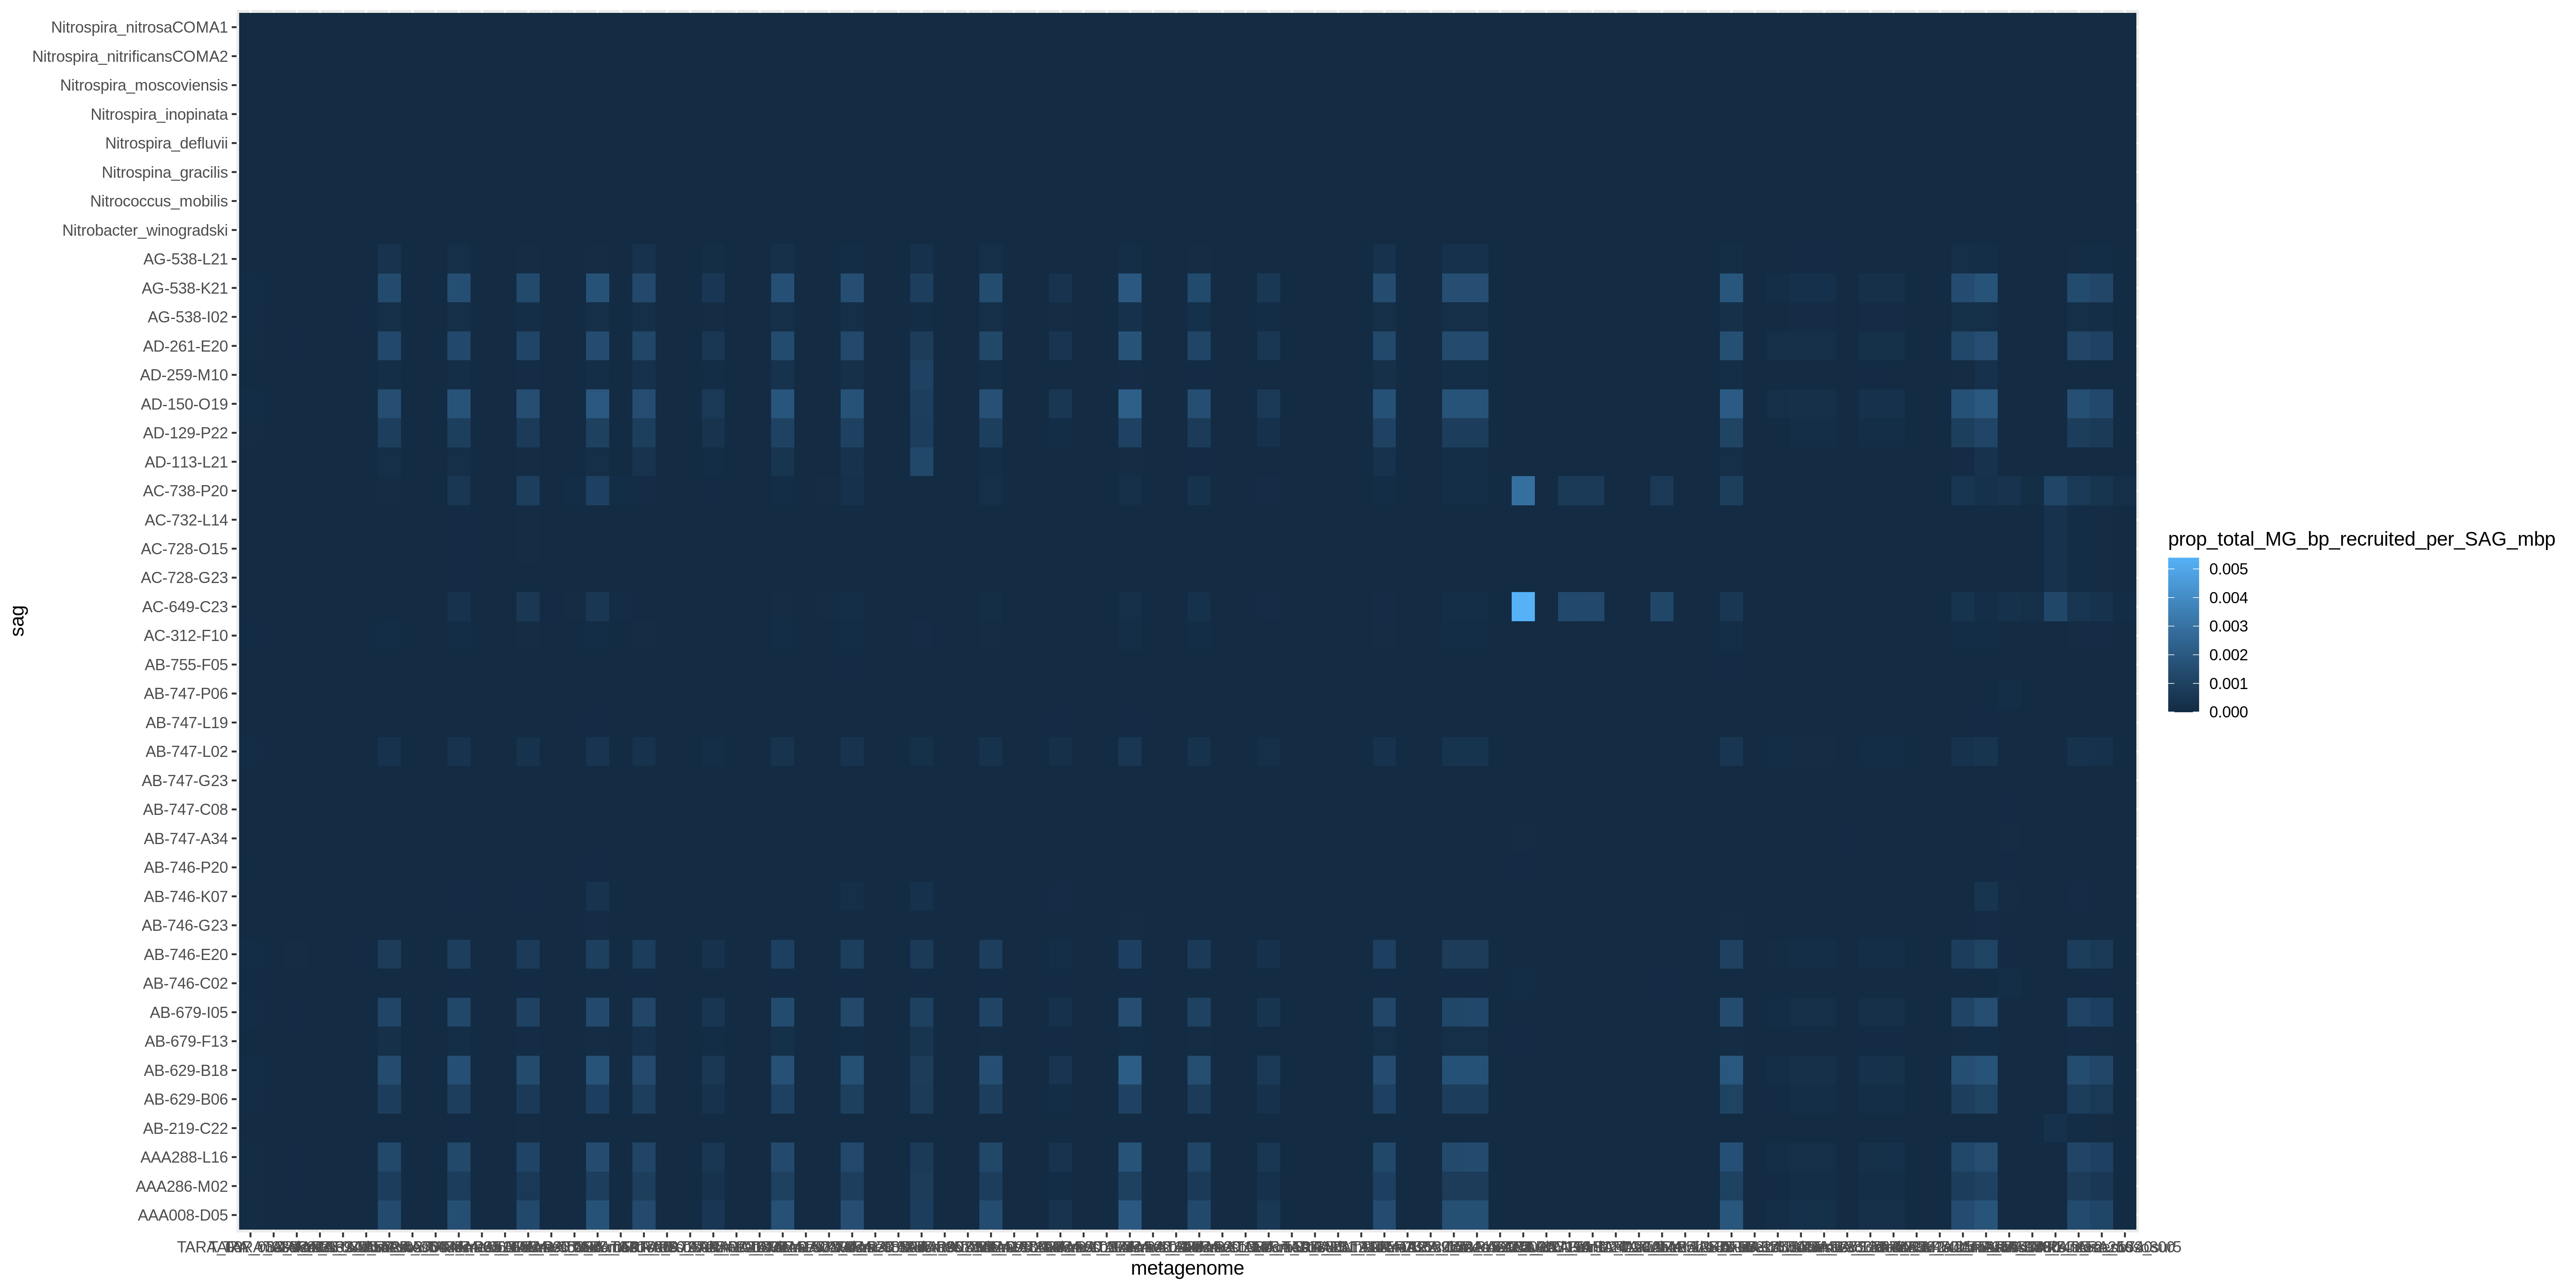

In [41]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 300)
ggplot(NOB_table, aes(metagenome, sag, fill= prop_total_MG_bp_recruited_per_SAG_mbp)) + 
  geom_tile()

That looks awful for many more reasons that I have time to mention

Warning message:
“Transformation introduced infinite values in discrete y-axis”


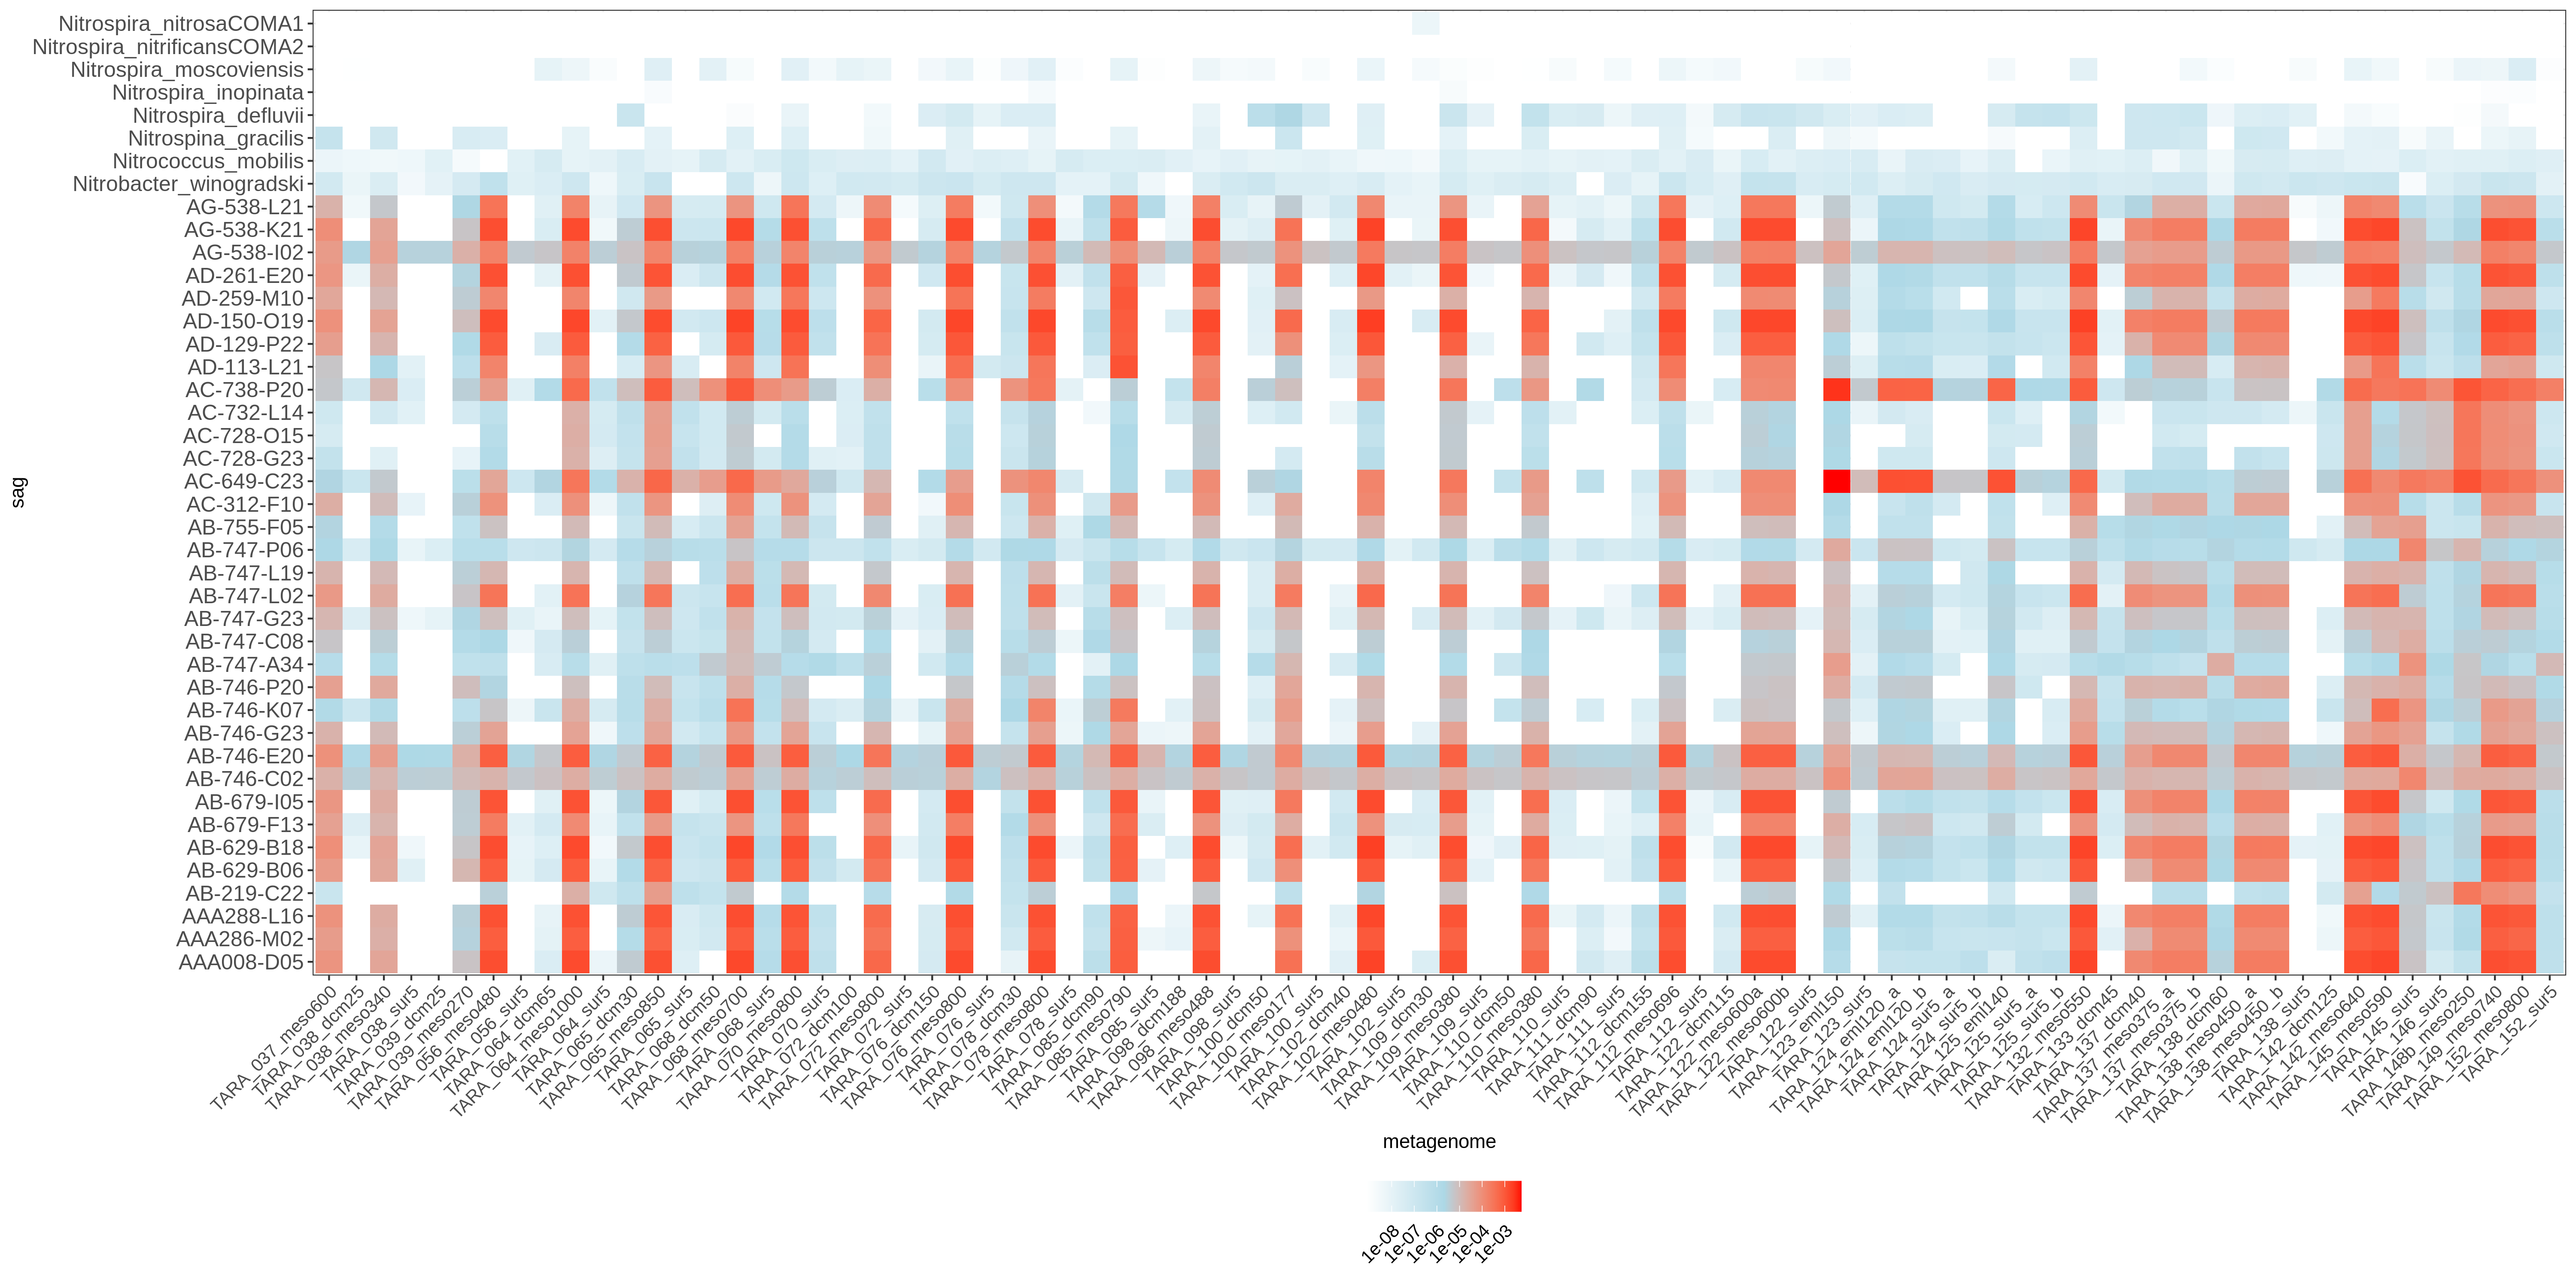

In [42]:
#change the scale to logarithmic; change the colors (with reflect zeros; cold color for low abundance; warm color for high adundance )
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 300)
ggplot(NOB_table, aes(metagenome, sag, fill= prop_total_MG_bp_recruited_per_SAG_mbp)) + 
  geom_tile()+scale_fill_gradientn(colours=c("white","lightblue","red"), trans="log", na.value="white",breaks=c(0.00000001, 0.0000001,0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1))+ theme_bw()+theme(legend.position = "bottom",legend.title = element_blank(),  legend.text = element_text(size = 10, angle = 45,hjust = 1, vjust = 1), axis.text.x = element_text(size = 10, angle = 45,hjust = 1, vjust = 1), axis.text.y = element_text(size = 12))

That is a bit better but it still needs impovement; there is a pattern related to the origin of metagenomes

In [ ]:
###write your own code; try to cluster (use Bray-curtis or any other similary index) both metagenomes and metatranscriptomes. Does the heatmap looks better?

### I find that beautifying heatmas is extremely changing. Fortunately Dr. Julia Brown, wrote a script that creates beautiful plots https://github.com/juliambrosman/sag-mg-recruit/blob/master/smr_plotting_functions.R


### Maps (the biologists way i.e. totally primitive)

In [43]:
#Load one more library for the map constuction
library(maps)
library(mapdata)


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




In [44]:
#Clean the abundance table to only keep one genome "AG-538-K21" for this example; ant its abundance in any of the metagenones investigated
AG538K21abund<-NOB_table%>%filter(sag=="AG-538-K21")%>%
  separate(metagenome, c("Expedition", "Station_number", "Depth"), sep = "_", remove = FALSE)%>%
  unite("Station", Expedition:Station_number, remove = FALSE)

AG538K21abund<-AG538K21abund[,c("sag", "Station", "prop_total_MG_bp_recruited_per_SAG_mbp")]

Warning message:
“Expected 3 pieces. Additional pieces discarded in 10 rows [58, 59, 60, 61, 63, 64, 68, 69, 71, 72].”


In [45]:
#Use the sample info table we downloaded from Tara to get the coordinates of each metagenome
sample_info_coord<-sample_info%>%select(Station=2, Lat=9, Lon=10)%>%distinct()%>%
  group_by(Station)%>%filter(row_number()==1)

ERROR: Error in eval(lhs, parent, parent): object 'sample_info' not found


In [ ]:
#merge the two table
AG538K21abund_coord<-merge(AG538K21abund,sample_info_coord, by.x="Station")

In [ ]:
#I like to make my own colors and this is another way to do it. I need one of them to be transparent
red_custom <- rgb(255, 33, 33, max = 255, alpha = 255, names = "red_custom")
red_custom_t <- rgb(255, 33, 33, max = 255, alpha = 175, names = "red_custom_t")

In [ ]:
map('world',col='gray45', border= "gray45", fill=TRUE)
points(AG538K21abund_coord$Lon, AG538K21abund_coord$Lat, pch=21, col=red_custom, bg=red_custom_t, cex=10*100*2.54*AG538K21abund_coord$prop_total_MG_bp_recruited_per_SAG_mbp)

#scale 0.5%
points(140, -74, pch=21, col=red_custom, bg="white", cex=5)

*Disclaimer: I cannot figure out how to adjust the size of the map in the notebook. But it looks ok exported. Use this sequence of command to export any of the other figures.

In [ ]:
# make an output directory for your plot (if there is not any)
dir.create(output_figures)
# open a pdf file
pdf("output_figures/map.pdf") 
# create the plot
map('world',col='gray45', border= "gray45", fill=TRUE)
points(AG538K21abund_coord$Lon, AG538K21abund_coord$Lat, pch=21, col=red_custom, bg=red_custom_t, cex=10*100*2.54*AG538K21abund_coord$prop_total_MG_bp_recruited_per_SAG_mbp)
# close the pdf file
dev.off() 

I am certain that you are going to learn better ways to plot data on the maps. Consider the abundance of a specific taxon or group as a variable and try plotting it using the tools you will learn. 